### Predictive Sport: probability of goals, shots, and more 


**Context:** 

A football game generates many events and it is very important and interesting to take into account the context in which those events were generated. This dataset should keep sports analytics enthusiasts awake for long hours as the number of questions that can be asked is huge.

Read <a href=http://crabstats.blogspot.com/>these blogs</a> to get a good understanding of soccer/football stats.


**Data description:** 

Nearly 25,000 soccer games from all leagues all over the world. The fields in the data set are: Columns A to E contains information about the league, home and away teams, date etc Columns F, G and H contain the odds for the home win, draw and away win Columns I to BQ contain the team statistics. 

Home team stats are prefixed with a "h" similarly, away team stats are prefixed with an "a". Examples include ladder position (which is a term for a rank in a group -  <a href=https://www.flashscore.com.au/football/europe/euro/standings/> here </a> an example), games played, goals conceded, away games won etc. Columns BR to CA contain final result information. That is the result, the full time result and if available, the half time score as well.

For each game there is: 
1. Statistics on the two teams, such as ladder position, win-loss history, games played 
2. Odds for home win, draw, away win (some-times is zero if odds not available) 
3. The result for that game (including the half time result if available

The dataset ranges from January 2016 to October 2017 and the statistics have been sourced from a few different websites. Odds come from BET365 and the results have been manually entered from http://www.soccerstats.com

Get more insight about the columns in the data by hovering your mouse in front of the names <a href=https://www.soccerstats.com/latest.asp?league=germany3>here</a>

**Data Location:** 
- https://www.kaggle.com/frankpac/soccerdata

---
### Instructions
Based on the scenario outlined above and the data associated with this project, you are required to perform A/B testing and Machine Learning analysis. You must also answer the quiz questions linked with this project. For convenience, the quiz questions are copied below. 

**Deadline:** Please complete the quiz, and submit all the data analysis work you carried out in this jupiter notebook via Github - see instructions below - at the very latest **by 23h59 on Thursday 8 August 2019**. 

**Why this project?**


This project is designed with the two main points in mind


We need to understand your proficiency in the important data science concepts (statistical, algorithmic, and others) and hard skills (advanced programming in python or R)
To give you an additional opportunity to add a few more data science project experience into your portfolio.  


So please put maximum effort to demonstrate your skill in this project. Answer the quiz with diligence, and perform the data analysis as best as you can. 

**Detailed instruction**:

- Git Fork/Clone the project jupyter notebooks and the corresponding data from this github: https://github.com/10acad/piq2019
The jupyter notebook “PredictiveSport.ipynb”, which contains this instruction in the first markdown cell, is for this project.
- The “data/SoccerData.xlsx” excel file is the data for this project
- Following the recommended tasks below, perform Exploratory and predictive analysis on the data.
- At the minimum you must perform an analysis that will allow you to answer some interview questions, visualize features, and produce a model to draw a reasonable conclusion. The more detailed your data analysis and clear answers to the quiz, the better it will be for your selection as 10 Academy Fellow as well as you stand a better chance to get a job interviews. Note that these notebooks and your other work at Github are critical for your Data Science Career - as they are the evidence to your skills. So even after submitting whatever you managed to do by the deadline, keep improving your model and explanations.  
- PLEASE SUBMIT WHATEVER YOU MANAGED TO DO BEFORE THE DEADLINE. WE KNOW THE TIME IS SHORT, AND IT IS FOR A PURPOSE. 
- Upload your jupyter notebook to your Github public repository. If you have forked Github link above, which is what we recommend, then you just have to do the following 
    - git add -u *  #add all modified files tracked by git 
    - git commit -m ‘submit’ 
    - git push
- Copy the Github link to your version of “PredictiveSport.ipynb” and paste it here (the 10 Academy quiz page). If you prefer, there is also a possibility to directly upload your jupyter notebook.
- If you have any questions or confusions regarding what you are expected to do in this project or how to submit, please contact community@10academy.org well before the deadline.


### Objectives:

**Exploratory analysis:**
- Understand which leagues & teams are represented in this data set - use histograms, pandas groupbys to get ideas on this 
- Explain if playing at home have a higher chance of winning? What about draws and loses?
- Explain how are predicted odds correlated to final results? 
- How many teams played more than 10 games (at home or away)?
- How are the home or away statistics distributed? Is there an imbalance in the data set?
- Be creative and explore the data set, make histograms, line (trend) plots to understand the nature of the data


**Predictive analysis:** 
- Which column has the most missing values (note that the *_odds columns are zero when no data is available)?
- Is it feasible to drop all rows with missing values? If not, try to fill missing values with an appropriate strategy.
- drop columns with greater than 50% missing values
- consider dropping teams with  
- split the data into training (60%), validation(30%) and test(10%) 
- There are 81 columns, explain which columns are highly correlated? (you may get insight on this from your exploratory analysis, plotting covariance matrices) 
- Create predictive models for football games in order to bet on football outcomes. This involves training a model for a subset of features e.g. (home,odd,ladder), and predicting a target variable e.g. win, draw, loss. Consider the following three algorithms. Comment on the relative performance if you are able to run two or three of them 
    - random forest classifier
    - xgboost 
    - neural networks
- make visualizations predicted outcomes (wins vs losses) together with the ground truth for the validation set
- make sure your model is not overfitting the training data - the statistical precision you would obtain running your model on the training data should be statistically similar to the validation data. Otherwise, the model is not generalizing (overfitting the training set)  


- Given your exploratory and predictive analysis, comment on what else you can do with the current data?

In [1]:
## import needed modules
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
color = sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('fivethirtyeight')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore warnings from sklearn and seaborn

In [2]:
soccer = pd.read_excel("./data/SoccerData.xlsx")

In [3]:
print('Shape before removing duplicate rows:', soccer.shape)
soccer.drop_duplicates()
print('Shape after removing duplicate rows:', soccer.shape)

Shape before removing duplicate rows: (24830, 81)
Shape after removing duplicate rows: (24830, 81)


In [4]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24830 entries, 0 to 24829
Data columns (total 81 columns):
league           24830 non-null object
teams_no         24830 non-null int64
date             24830 non-null datetime64[ns]
home_team        24830 non-null object
away_team        24830 non-null object
home_odd         24830 non-null float64
draw_odd         24830 non-null float64
away_odd         24830 non-null float64
h_played         24830 non-null int64
a_played         24830 non-null int64
ph_ladder5       24830 non-null int64
ph_ladder4       24830 non-null int64
ph_ladder3       24830 non-null int64
ph_ladder2       24830 non-null int64
ph_ladder1       24830 non-null int64
h_ladder         24830 non-null int64
pa_ladder5       24830 non-null int64
pa_ladder4       24830 non-null int64
pa_ladder3       24830 non-null int64
pa_ladder2       24830 non-null int64
pa_ladder1       24830 non-null int64
a_ladder         24830 non-null int64
h_won            24830 non-null int64

In [5]:
soccer.describe().T

,count,mean,std,min,25%,50%,75%,max
teams_no,24830.0,18.399195,4.174364,10.00,16.000000,20.000000,22.000000,30.00
home_odd,24830.0,1.874239,1.734159,-1.56,0.000000,1.910000,2.500000,28.01
draw_odd,24830.0,2.753825,1.847875,0.00,0.000000,3.320000,3.610000,26.00
away_odd,24830.0,3.093021,3.127766,0.00,0.000000,2.880000,4.090000,48.81
h_played,24830.0,19.237294,11.773077,0.00,9.000000,20.000000,28.000000,73.00
a_played,24830.0,19.241764,11.784165,0.00,9.000000,20.000000,28.000000,73.00
ph_ladder5,24830.0,8.497181,6.314190,0.00,3.000000,8.000000,13.000000,30.00
ph_ladder4,24830.0,8.800403,6.216387,0.00,4.000000,8.000000,13.000000,30.00
ph_ladder3,24830.0,9.010632,6.125440,0.00,4.000000,8.000000,14.000000,30.00
ph_ladder2,24830.0,9.318929,6.009516,0.00,4.000000,9.000000,14.000000,30.00


In [6]:
## check for number of missing values
soccer.isnull().sum()

league               0
teams_no             0
date                 0
home_team            0
away_team            0
home_odd             0
draw_odd             0
away_odd             0
h_played             0
a_played             0
ph_ladder5           0
ph_ladder4           0
ph_ladder3           0
ph_ladder2           0
ph_ladder1           0
h_ladder             0
pa_ladder5           0
pa_ladder4           0
pa_ladder3           0
pa_ladder2           0
pa_ladder1           0
a_ladder             0
h_won                0
h_drawn              0
h_lost               0
h_scored             0
h_conced             0
h_points             0
a_won                0
a_drawn              0
                 ...  
a_form               0
h_elo                0
a_elo                0
h_offensiv           0
h_defensiv           0
a_offensiv           0
a_defensiv           0
h_clean              0
a_clean              0
h_fail               0
a_fail               0
h_clean_h            0
a_clean_a  

In [7]:
soccer.columns

Index(['league', 'teams_no', 'date', 'home_team', 'away_team', 'home_odd',
       'draw_odd', 'away_odd', 'h_played', 'a_played', 'ph_ladder5',
       'ph_ladder4', 'ph_ladder3', 'ph_ladder2', 'ph_ladder1', 'h_ladder',
       'pa_ladder5', 'pa_ladder4', 'pa_ladder3', 'pa_ladder2', 'pa_ladder1',
       'a_ladder', 'h_won', 'h_drawn', 'h_lost', 'h_scored', 'h_conced',
       'h_points', 'a_won', 'a_drawn', 'a_lost', 'a_scored', 'a_conced',
       'a_points', 'h_ladder_h', 'h_played_h', 'h_won_h', 'h_drawn_h',
       'h_lost_h', 'h_scored_h', 'h_conced_h', 'h_points_h', 'a_ladder_a',
       'a_played_a', 'a_won_a', 'a_drawn_a', 'a_lost_a', 'a_scored_a',
       'a_conced_a', 'a_points_a', 'h_form', 'a_form', 'h_elo', 'a_elo',
       'h_offensiv', 'h_defensiv', 'a_offensiv', 'a_defensiv', 'h_clean',
       'a_clean', 'h_fail', 'a_fail', 'h_clean_h', 'a_clean_a', 'h_fail_h',
       'a_fail_a', 'h_goal_signal', 'a_goal_signal', 'Ladder_signal', 'RESULT',
       'h_final', 'a_final', 'h_half',

In [8]:
##replace missing (i.e. 0) values with np.nan
nan_cols = ["home_odd","draw_odd", "away_odd"]
for column in nan_cols:
    soccer.loc[soccer[column] == 0, column] = np.nan
    soccer[column].fillna(soccer[column].median(),inplace=True)
print(soccer.isnull().sum())

league               0
teams_no             0
date                 0
home_team            0
away_team            0
home_odd             0
draw_odd             0
away_odd             0
h_played             0
a_played             0
ph_ladder5           0
ph_ladder4           0
ph_ladder3           0
ph_ladder2           0
ph_ladder1           0
h_ladder             0
pa_ladder5           0
pa_ladder4           0
pa_ladder3           0
pa_ladder2           0
pa_ladder1           0
a_ladder             0
h_won                0
h_drawn              0
h_lost               0
h_scored             0
h_conced             0
h_points             0
a_won                0
a_drawn              0
                 ...  
a_form               0
h_elo                0
a_elo                0
h_offensiv           0
h_defensiv           0
a_offensiv           0
a_defensiv           0
h_clean              0
a_clean              0
h_fail               0
a_fail               0
h_clean_h            0
a_clean_a  

,Total,Percent
Unnamed: 79,24830,1.000000
Unnamed: 80,24568,0.989448
a_half,9101,0.366532
h_half,9101,0.366532
A2H,7465,0.300644


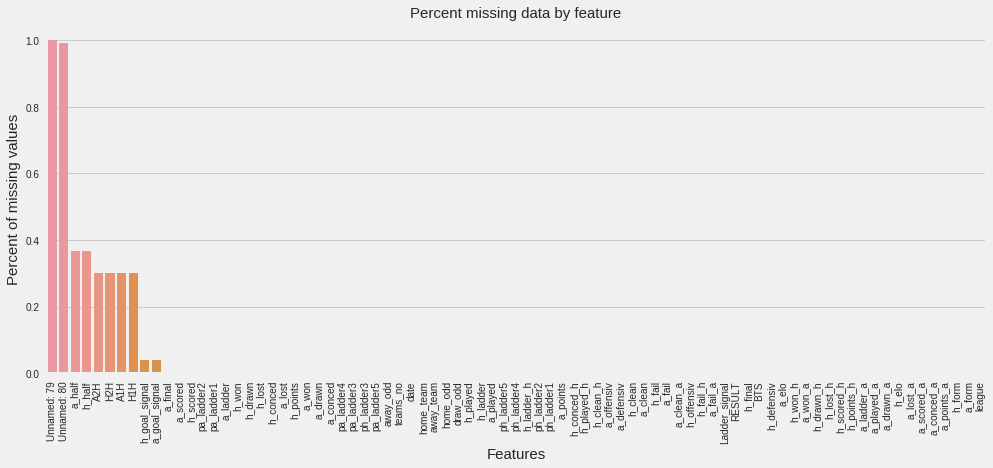

In [9]:
## percentage of missing values
total = soccer.isnull().sum().sort_values(ascending=False)
percent = (soccer.isnull().sum()/soccer.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

**'Unnamed: 79' feature has the highest percentage of missing values**

In [10]:
#drop the columns with more than 50% missing values
soccer = soccer.drop(['Unnamed: 79', 'Unnamed: 80'], axis=1)

HOME    0.410552
AWAY    0.312364
DRAW    0.277084
Name: RESULT, dtype: float64


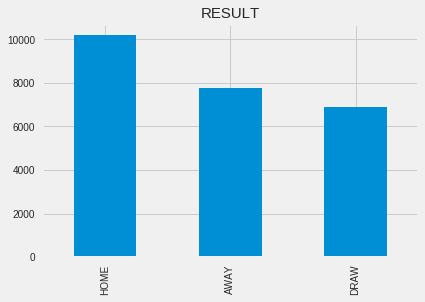

In [11]:
print(soccer["RESULT"].value_counts(normalize=True))
soccer["RESULT"].value_counts().plot(kind='bar')
plt.title("RESULT", fontsize=15)
plt.show() # Matches won at home appears to be the highest

In [12]:
## drop rows with missing values
print("shape before dropping missing rows", soccer.shape)
soccer_dropped = soccer.dropna()
print("shape after dropping missing rows", soccer_dropped.shape)

shape before dropping missing rows (24830, 79)
shape after dropping missing rows (15074, 79)


In [13]:
soccer_num_rows_lost = round(100*(soccer.shape[0] - soccer_dropped.shape[0])/float(soccer.shape[0]))
print("Lost {}% of rows in the soccer dataset".format(soccer_num_rows_lost)) ## lost about 39% of the rows from the dataset

Lost 39% of rows in the soccer dataset


**It is not feasible to drop all rows with missing values, it will lead to lost of 39% of the rows in the soccer dataser as shown in above. Hence, we fill the missing values with the median of the respective features. Median is used due to the presence of outliers in the dataset**

In [14]:
soccer.mean() #soccer mean values of each column excluding missing values

teams_no           18.399195
home_odd            2.446744
draw_odd            3.663558
away_odd            3.981841
h_played           19.237294
a_played           19.241764
ph_ladder5          8.497181
ph_ladder4          8.800403
ph_ladder3          9.010632
ph_ladder2          9.318929
ph_ladder1          9.449617
h_ladder            8.739549
pa_ladder5          8.521305
pa_ladder4          8.775473
pa_ladder3          9.057551
pa_ladder2          9.251712
pa_ladder1          9.559726
a_ladder            8.548812
h_won               7.016512
h_drawn             5.187314
h_lost              7.033468
h_scored           24.799476
h_conced           24.837696
h_points           26.236851
a_won               7.084817
a_drawn             5.183850
a_lost              6.973097
a_scored           24.943536
a_conced           24.715586
a_points           26.438300
                    ...     
a_scored_a         10.557149
a_conced_a         13.684857
a_points_a         10.590173
h_form        

In [15]:
soccer_dropped.mean() #soccer_dropped mean values of each column excluding missing values

teams_no           19.052806
home_odd            2.480955
draw_odd            3.711258
away_odd            4.077323
h_played           20.622064
a_played           20.624121
ph_ladder5          9.230065
ph_ladder4          9.522091
ph_ladder3          9.738424
ph_ladder2         10.018243
ph_ladder1          9.940162
h_ladder            8.992902
pa_ladder5          9.257662
pa_ladder4          9.498408
pa_ladder3          9.792159
pa_ladder2          9.973929
pa_ladder1         10.067202
a_ladder            8.880987
h_won               7.552209
h_drawn             5.513998
h_lost              7.555858
h_scored           26.923842
h_conced           26.948189
h_points           28.170625
a_won               7.615099
a_drawn             5.510747
a_lost              7.498275
a_scored           27.096524
a_conced           26.843041
a_points           28.356044
                    ...     
a_scored_a         11.458671
a_conced_a         14.922118
a_points_a         11.281544
h_form        

In [16]:
# percentage change in means
(soccer_dropped.mean() - soccer.mean()) / soccer.mean()

teams_no         0.035524
home_odd         0.013982
draw_odd         0.013020
away_odd         0.023979
h_played         0.071984
a_played         0.071841
ph_ladder5       0.086250
ph_ladder4       0.082006
ph_ladder3       0.080770
ph_ladder2       0.075042
ph_ladder1       0.051912
h_ladder         0.028989
pa_ladder5       0.086414
pa_ladder4       0.082381
pa_ladder3       0.081104
pa_ladder2       0.078063
pa_ladder1       0.053085
a_ladder         0.038856
h_won            0.076348
h_drawn          0.062977
h_lost           0.074272
h_scored         0.085662
h_conced         0.084971
h_points         0.073705
a_won            0.074848
a_drawn          0.063061
a_lost           0.075315
a_scored         0.086314
a_conced         0.086077
a_points         0.072537
                   ...   
a_scored_a       0.085394
a_conced_a       0.090411
a_points_a       0.065284
h_form          -0.030532
a_form           0.092908
h_elo           -0.009374
a_elo           -0.009790
h_offensiv  

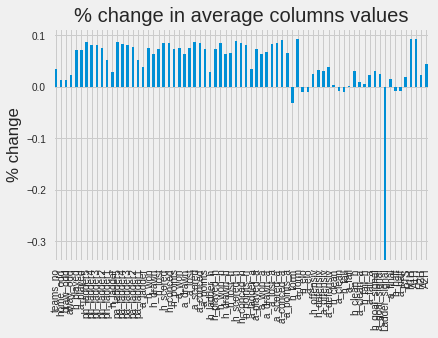

In [17]:
# percentage change in means as a bar chart
ax = ((soccer_dropped.mean() - soccer.mean()) / soccer.mean()).plot(kind="bar", title="% change in average columns values")
ax.set_ylabel("% change")
# the changes in the dataset features is too significant. Hence, dropping the missing rows isnt an option

In [18]:
# fill continuous features missing values with median of the features due to the presence of outliers
num_colums = ['h_goal_signal', 'a_goal_signal', 'a_final', 'h_half', 'a_half', 'H1H', 'A1H', 'H2H', 'A2H']
for column in num_colums:
    soccer[column].fillna(soccer[column].median(),inplace=True)

In [19]:
soccer.head()

,league,teams_no,date,home_team,away_team,home_odd,draw_odd,away_odd,h_played,a_played,...,RESULT,h_final,a_final,h_half,a_half,BTS,H1H,A1H,H2H,A2H
0,France-Ligue 2,20,2016-01-08,Ajaccio,Le Havre,2.63,2.97,3.24,19,19,...,DRAW,1,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0
1,France-Ligue 2,20,2016-01-08,Auxerre,Valenciennes,1.98,3.25,4.69,19,19,...,DRAW,1,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0
2,France-Ligue 2,20,2016-01-08,Bourg Peronnas,Creteil,2.00,3.52,4.14,19,19,...,HOME,5,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0
3,France-Ligue 2,20,2016-01-08,Chamois,Dijon,2.82,3.06,2.91,19,19,...,DRAW,2,2.0,0.0,0.0,1,0.0,0.0,0.0,0.0
4,France-Ligue 2,20,2016-01-08,Clermont,Evian,2.10,3.21,4.20,19,19,...,HOME,4,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0


In [20]:
soccer.shape

(24830, 79)

In [21]:
soccer.isnull().sum()

league           0
teams_no         0
date             0
home_team        0
away_team        0
home_odd         0
draw_odd         0
away_odd         0
h_played         0
a_played         0
ph_ladder5       0
ph_ladder4       0
ph_ladder3       0
ph_ladder2       0
ph_ladder1       0
h_ladder         0
pa_ladder5       0
pa_ladder4       0
pa_ladder3       0
pa_ladder2       0
pa_ladder1       0
a_ladder         0
h_won            0
h_drawn          0
h_lost           0
h_scored         0
h_conced         0
h_points         0
a_won            0
a_drawn          0
                ..
a_points_a       0
h_form           0
a_form           0
h_elo            0
a_elo            0
h_offensiv       0
h_defensiv       0
a_offensiv       0
a_defensiv       0
h_clean          0
a_clean          0
h_fail           0
a_fail           0
h_clean_h        0
a_clean_a        0
h_fail_h         0
a_fail_a         0
h_goal_signal    0
a_goal_signal    0
Ladder_signal    0
RESULT           0
h_final     

In [22]:
numerical_col_1 = ["teams_no", "date", "home_odd", "draw_odd", "away_odd", "h_played", "a_played", "ph_ladder5", 
"ph_ladder4", "ph_ladder3", "ph_ladder2", "ph_ladder1", "h_ladder", "pa_ladder5", "pa_ladder4", "pa_ladder3",
"pa_ladder2"]
numerical_col_2 = ["pa_ladder1", "a_ladder", "h_won", "h_drawn", "h_lost", "h_scored", "h_conced", "h_points",
"a_won", "a_drawn", "a_lost", "a_scored", "a_conced", "a_points", "h_ladder_h", "h_played_h", "h_won_h",
"h_drawn_h", "h_lost_h", "h_scored_h", "h_conced_h", "h_points_h", "a_ladder_a", "a_played_a", "a_won_a", 
"a_drawn_a", "a_lost_a", "a_scored_a", "a_conced_a", "a_points_a"]
numerical_col_3 = ["h_form", "a_form", "h_elo", "a_elo", 
"h_offensiv", "h_defensiv", "a_offensiv", "a_defensiv", "h_clean", "a_clean", "h_fail", "a_fail", "h_clean_h",
"a_clean_a", "h_fail_h", "a_fail_a", "h_goal_signal", "a_goal_signal", "Ladder_signal", "h_final", "a_final", 
"h_half", "a_half", "BTS", "H1H", "A1H", "H2H", "A2H"]


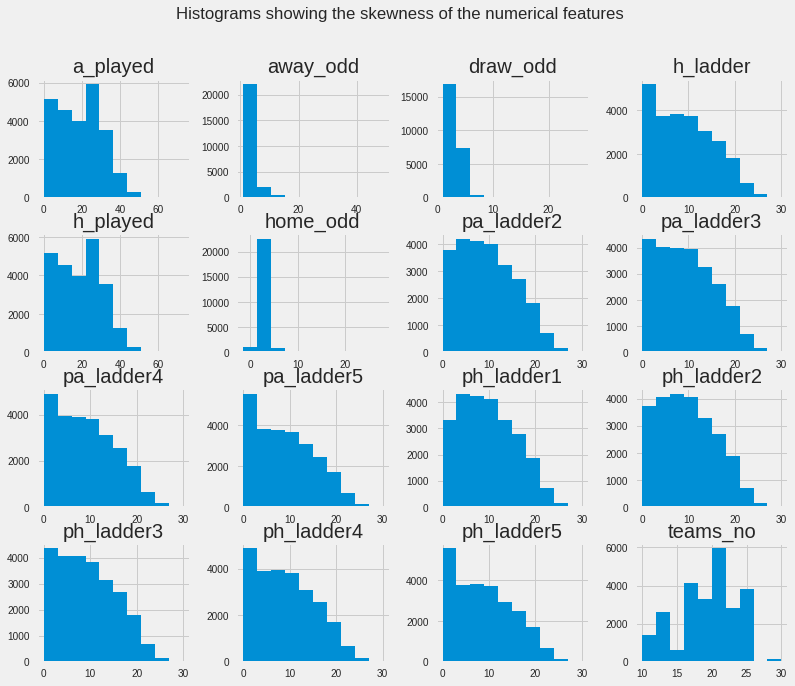

Skewness of the numerical features


teams_no     -0.334857
home_odd      5.921802
draw_odd      7.272974
away_odd      4.731626
h_played      0.297495
a_played      0.302829
ph_ladder5    0.391943
ph_ladder4    0.372512
ph_ladder3    0.365940
ph_ladder2    0.354400
ph_ladder1    0.373831
h_ladder      0.358146
pa_ladder5    0.391226
pa_ladder4    0.373605
pa_ladder3    0.356734
pa_ladder2    0.367376
dtype: float64

In [23]:
soccer[numerical_col_1].hist(figsize=(12,10), bins=10)
plt.suptitle('Histograms showing the skewness of the numerical features')
plt.show()

print('Skewness of the numerical features')
soccer[numerical_col_1].skew() 
## we can see that away_odd, draw_odd and home_odd are highly skewed. Hence we need to apply log function to them

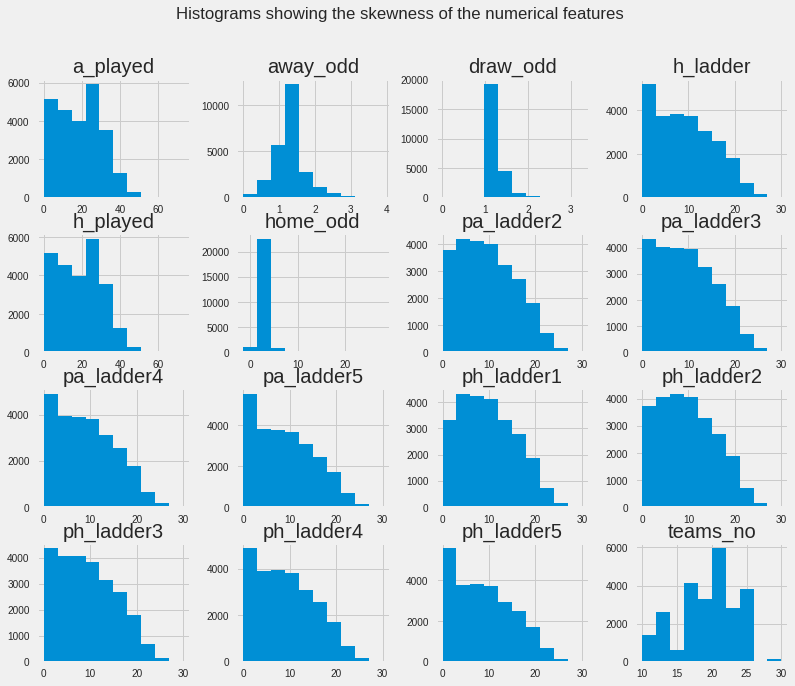

Skewness of the numerical features


teams_no     -0.334857
home_odd      5.921802
draw_odd      3.298310
away_odd      1.027062
h_played      0.297495
a_played      0.302829
ph_ladder5    0.391943
ph_ladder4    0.372512
ph_ladder3    0.365940
ph_ladder2    0.354400
ph_ladder1    0.373831
h_ladder      0.358146
pa_ladder5    0.391226
pa_ladder4    0.373605
pa_ladder3    0.356734
pa_ladder2    0.367376
dtype: float64

In [24]:
import math
to_log = ['draw_odd', 'away_odd']
#to_log = ['home_odd', 'draw_odd', 'away_odd']
soccer[to_log] = soccer[to_log].applymap(math.log)

soccer[numerical_col_1].hist(figsize=(12,10), bins=10)
plt.suptitle('Histograms showing the skewness of the numerical features')
plt.show()

print('Skewness of the numerical features')
soccer[numerical_col_1].skew() 

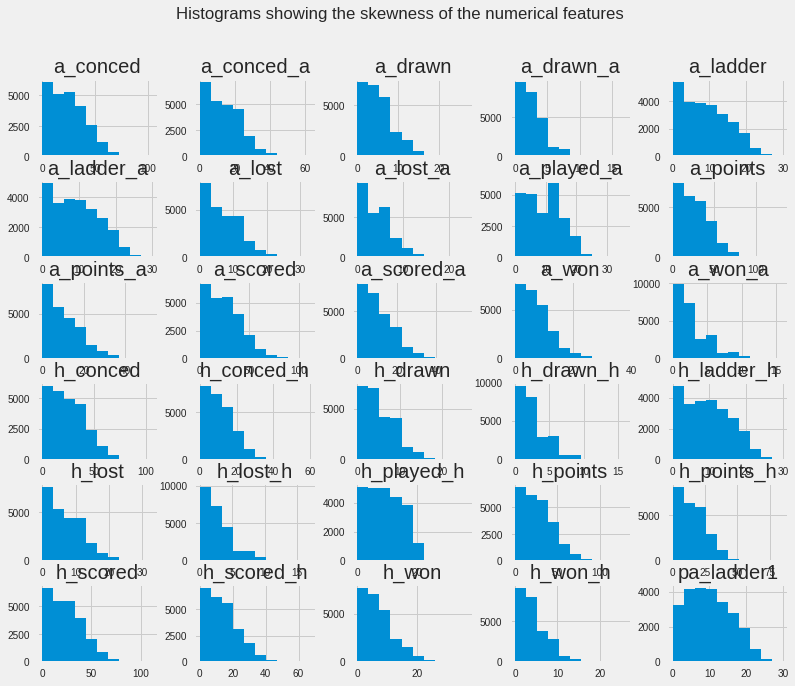

Skewness of the numerical features


pa_ladder1    0.355254
a_ladder      0.394172
h_won         0.917231
h_drawn       0.795049
h_lost        0.753088
h_scored      0.660905
h_conced      0.542710
h_points      0.717832
a_won         0.912463
a_drawn       0.815573
a_lost        0.741862
a_scored      0.668038
a_conced      0.539274
a_points      0.721438
h_ladder_h    0.301744
h_played_h    0.301387
h_won_h       0.835369
h_drawn_h     0.948824
h_lost_h      1.063527
h_scored_h    0.716996
h_conced_h    0.725470
h_points_h    0.669786
a_ladder_a    0.328388
a_played_a    0.300710
a_won_a       1.155501
a_drawn_a     0.966588
a_lost_a      0.741343
a_scored_a    0.810761
a_conced_a    0.606827
a_points_a    0.926329
dtype: float64

In [25]:
soccer[numerical_col_2].hist(figsize=(12,10), bins=10)
plt.suptitle('Histograms showing the skewness of the numerical features')
plt.show()

print('Skewness of the numerical features')
soccer[numerical_col_2].skew() 
## we can see that all the features in numerical_col_1 seems to be normal

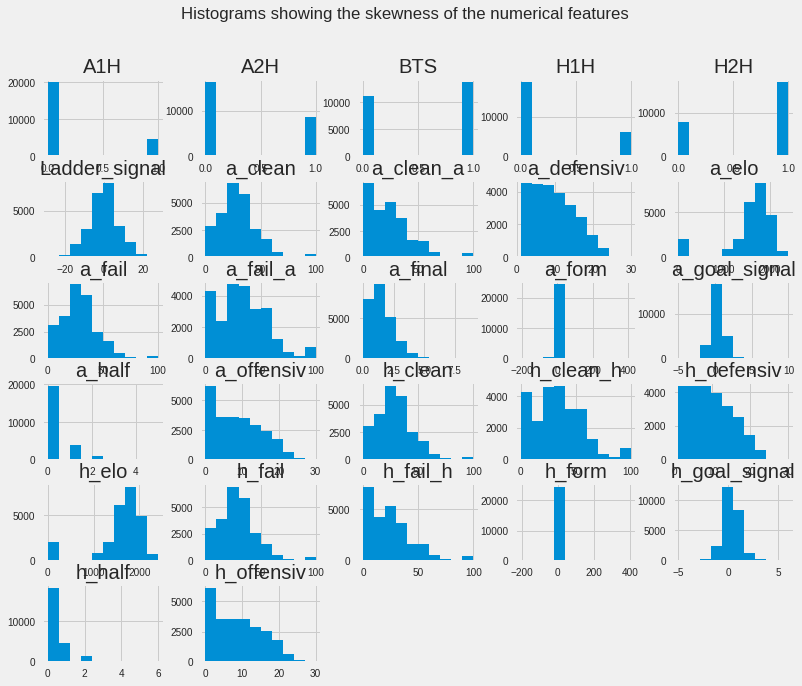

Skewness of the numerical features


h_form           4.250334
a_form           5.586704
h_elo           -1.998125
a_elo           -1.984482
h_offensiv       0.379487
h_defensiv       0.392635
a_offensiv       0.409621
a_defensiv       0.408834
h_clean          0.818540
a_clean          0.902410
h_fail           0.927982
a_fail           0.802741
h_clean_h        0.648581
a_clean_a        1.183545
h_fail_h         1.175987
a_fail_a         0.655938
h_goal_signal    0.092600
a_goal_signal   -0.134698
Ladder_signal    0.013074
a_final          1.053616
h_half           2.157404
a_half           2.513157
BTS             -0.199139
H1H              1.161607
A1H              1.553008
H2H             -0.784249
A2H              0.632817
dtype: float64

In [26]:
soccer[numerical_col_3].hist(figsize=(12,10), bins=10)
plt.suptitle('Histograms showing the skewness of the numerical features')
plt.show()

print('Skewness of the numerical features')
soccer[numerical_col_3].skew() 
## we can see that h_form and a_form are skewed

In [27]:
soccer.head()

,league,teams_no,date,home_team,away_team,home_odd,draw_odd,away_odd,h_played,a_played,...,RESULT,h_final,a_final,h_half,a_half,BTS,H1H,A1H,H2H,A2H
0,France-Ligue 2,20,2016-01-08,Ajaccio,Le Havre,2.63,1.088562,1.175573,19,19,...,DRAW,1,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0
1,France-Ligue 2,20,2016-01-08,Auxerre,Valenciennes,1.98,1.178655,1.545433,19,19,...,DRAW,1,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0
2,France-Ligue 2,20,2016-01-08,Bourg Peronnas,Creteil,2.00,1.258461,1.420696,19,19,...,HOME,5,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0
3,France-Ligue 2,20,2016-01-08,Chamois,Dijon,2.82,1.118415,1.068153,19,19,...,DRAW,2,2.0,0.0,0.0,1,0.0,0.0,0.0,0.0
4,France-Ligue 2,20,2016-01-08,Clermont,Evian,2.10,1.166271,1.435085,19,19,...,HOME,4,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0


In [28]:
## correlation among features
soccer.corr()

,teams_no,home_odd,draw_odd,away_odd,h_played,a_played,ph_ladder5,ph_ladder4,ph_ladder3,ph_ladder2,...,a_goal_signal,Ladder_signal,a_final,h_half,a_half,BTS,H1H,A1H,H2H,A2H
teams_no,1.000000,-0.041671,-0.103282,0.005747,0.216983,0.217302,0.298975,0.307608,0.317494,0.331566,...,0.008056,-0.005327,-0.036277,0.055630,0.040542,-0.006283,0.056477,0.041225,-0.088588,0.092087
home_odd,-0.041671,1.000000,0.096326,-0.663511,0.017599,0.017836,0.188608,0.194434,0.203492,0.208431,...,-0.341420,-0.420826,0.187417,-0.073941,0.123624,-0.015034,-0.065690,0.104560,-0.106977,0.099200
draw_odd,-0.103282,0.096326,1.000000,0.548507,0.028772,0.027992,-0.195111,-0.209237,-0.221482,-0.236545,...,0.053901,0.259499,-0.014908,0.130309,0.025415,-0.000188,0.101273,0.020658,0.049489,0.000721
away_odd,0.005747,-0.663511,0.548507,1.000000,0.012598,0.010897,-0.290790,-0.307273,-0.325193,-0.342619,...,0.335513,0.568349,-0.198511,0.152504,-0.086247,-0.007981,0.129167,-0.074031,0.110499,-0.101656
h_played,0.216983,0.017599,0.028772,0.012598,1.000000,0.975384,0.339003,0.286416,0.237966,0.178730,...,-0.010165,0.017363,-0.051078,-0.026065,-0.030004,-0.056448,-0.049897,-0.048848,-0.051703,0.010324
a_played,0.217302,0.017836,0.027992,0.010897,0.975384,1.000000,0.336880,0.284542,0.238728,0.179319,...,-0.009755,0.014440,-0.052037,-0.026423,-0.030149,-0.056374,-0.050250,-0.049169,-0.050882,0.008567
ph_ladder5,0.298975,0.188608,-0.195111,-0.290790,0.339003,0.336880,1.000000,0.899470,0.833651,0.776999,...,0.009845,-0.423860,0.043280,-0.045255,0.035133,-0.020269,-0.046094,0.024227,-0.089967,0.065288
ph_ladder4,0.307608,0.194434,-0.209237,-0.307273,0.286416,0.284542,0.899470,1.000000,0.894144,0.830244,...,0.009192,-0.455306,0.049049,-0.047432,0.035264,-0.018028,-0.045754,0.023792,-0.092199,0.069550
ph_ladder3,0.317494,0.203492,-0.221482,-0.325193,0.237966,0.238728,0.833651,0.894144,1.000000,0.893780,...,0.007906,-0.488533,0.054309,-0.047479,0.042239,-0.013797,-0.044780,0.032947,-0.091502,0.070835
ph_ladder2,0.331566,0.208431,-0.236545,-0.342619,0.178730,0.179319,0.776999,0.830244,0.893780,1.000000,...,0.012034,-0.518677,0.062773,-0.051753,0.048543,-0.008685,-0.047430,0.038365,-0.088123,0.074171


In [29]:
## checking for categories
cat_col = ["league", "home_team", "away_team"]
for cat in cat_col:
    print('Number of unique {}'.format(cat),soccer[cat].nunique())

Number of unique league 58
Number of unique home_team 1087
Number of unique away_team 1082


# relationship between the categoric features and the target variable

In [30]:
soccer["RESULT"]=soccer["RESULT"].map({"HOME":1,"AWAY":0,"DRAW":2})

In [31]:
soccer.head()

,league,teams_no,date,home_team,away_team,home_odd,draw_odd,away_odd,h_played,a_played,...,RESULT,h_final,a_final,h_half,a_half,BTS,H1H,A1H,H2H,A2H
0,France-Ligue 2,20,2016-01-08,Ajaccio,Le Havre,2.63,1.088562,1.175573,19,19,...,2,1,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0
1,France-Ligue 2,20,2016-01-08,Auxerre,Valenciennes,1.98,1.178655,1.545433,19,19,...,2,1,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0
2,France-Ligue 2,20,2016-01-08,Bourg Peronnas,Creteil,2.00,1.258461,1.420696,19,19,...,1,5,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0
3,France-Ligue 2,20,2016-01-08,Chamois,Dijon,2.82,1.118415,1.068153,19,19,...,2,2,2.0,0.0,0.0,1,0.0,0.0,0.0,0.0
4,France-Ligue 2,20,2016-01-08,Clermont,Evian,2.10,1.166271,1.435085,19,19,...,1,4,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0


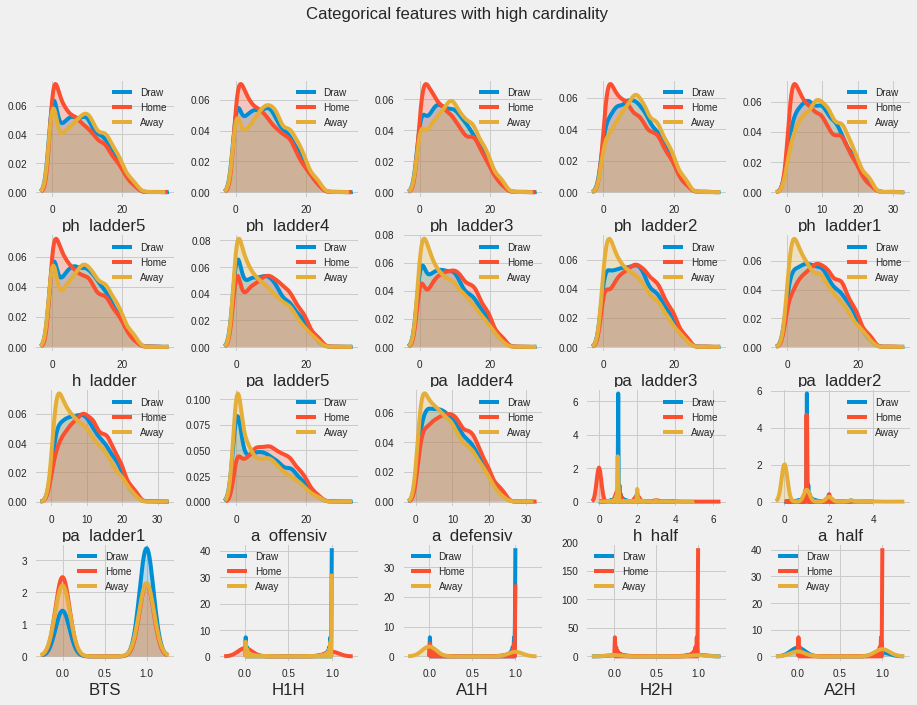

In [32]:
cat_cols = ['ph_ladder5','ph_ladder4', 'ph_ladder3', 'ph_ladder2', 'ph_ladder1', 'h_ladder',
            'pa_ladder5', 'pa_ladder4', 'pa_ladder3', 'pa_ladder2', 'pa_ladder1', 'a_offensiv', 
            'a_defensiv','h_half', 'a_half', 'BTS', 'H1H', 'A1H', 'H2H', 'A2H']
fig, axes = plt.subplots(ncols = 5, nrows = 4, figsize = (14,10))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
fig.suptitle("Categorical features with high cardinality")

for ax, col in zip(axes.flatten(), cat_cols) :
    sns.kdeplot(soccer[soccer["RESULT"] == 2][col], shade='True', label="Draw", ax = ax)
    sns.kdeplot(soccer[soccer["RESULT"] == 1][col], shade='True', label="Home", ax = ax)
    sns.kdeplot(soccer[soccer["RESULT"] == 0][col], shade='True', label="Away", ax = ax)
    ax.set_xlabel(col)

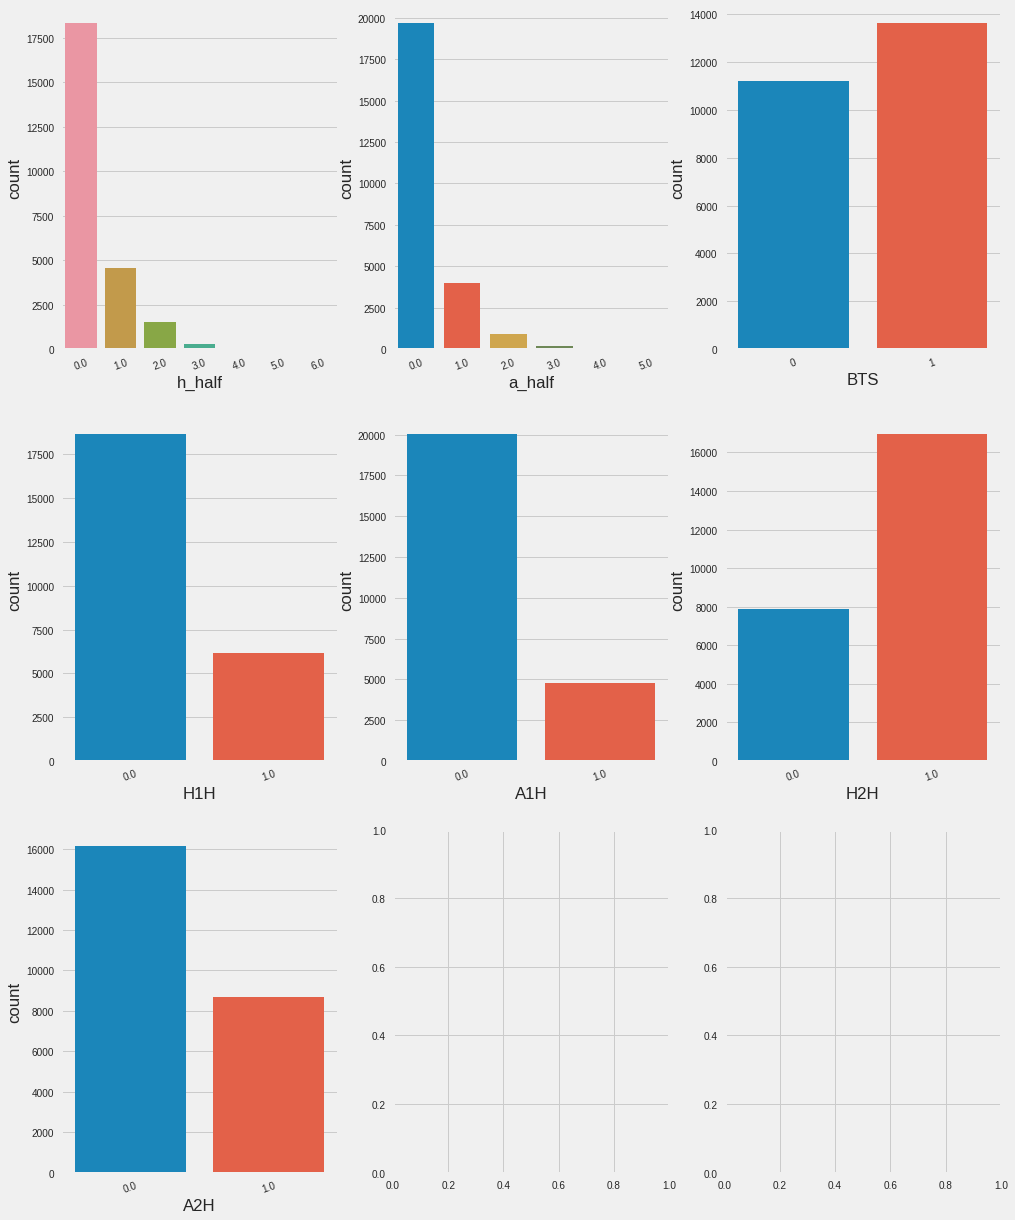

In [33]:
cat_cols_low_card = ['h_half', 'a_half', 'BTS', 'H1H', 'A1H', 'H2H', 'A2H']
fig, ax = plt.subplots(3, 3, figsize=(15, 20))
for variable, subplot in zip(cat_cols_low_card, ax.flatten()):
    sns.countplot(soccer[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)

# Predictive models for football games in order to bet on football outcomes

In [34]:
soccer.columns

Index(['league', 'teams_no', 'date', 'home_team', 'away_team', 'home_odd',
       'draw_odd', 'away_odd', 'h_played', 'a_played', 'ph_ladder5',
       'ph_ladder4', 'ph_ladder3', 'ph_ladder2', 'ph_ladder1', 'h_ladder',
       'pa_ladder5', 'pa_ladder4', 'pa_ladder3', 'pa_ladder2', 'pa_ladder1',
       'a_ladder', 'h_won', 'h_drawn', 'h_lost', 'h_scored', 'h_conced',
       'h_points', 'a_won', 'a_drawn', 'a_lost', 'a_scored', 'a_conced',
       'a_points', 'h_ladder_h', 'h_played_h', 'h_won_h', 'h_drawn_h',
       'h_lost_h', 'h_scored_h', 'h_conced_h', 'h_points_h', 'a_ladder_a',
       'a_played_a', 'a_won_a', 'a_drawn_a', 'a_lost_a', 'a_scored_a',
       'a_conced_a', 'a_points_a', 'h_form', 'a_form', 'h_elo', 'a_elo',
       'h_offensiv', 'h_defensiv', 'a_offensiv', 'a_defensiv', 'h_clean',
       'a_clean', 'h_fail', 'a_fail', 'h_clean_h', 'a_clean_a', 'h_fail_h',
       'a_fail_a', 'h_goal_signal', 'a_goal_signal', 'Ladder_signal', 'RESULT',
       'h_final', 'a_final', 'h_half',

In [35]:
## modules for cross validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import numpy.random as nr
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as sklm
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


In [36]:
#the features and label dataframes
feature_cols = ['home_odd','draw_odd', 'away_odd', 'h_played', 
                'a_played', 'ph_ladder5', 'ph_ladder4', 'ph_ladder3', 'ph_ladder2', 'ph_ladder1', 
                'h_ladder', 'pa_ladder5', 'pa_ladder4', 'pa_ladder3', 'pa_ladder2', 'pa_ladder1',
               'a_ladder']

In [37]:
Features = soccer[feature_cols]
Features = Features.to_numpy()
levels = {2:'DRAW', 1:'HOME', 0:'AWAY'}
Labels =  np.array([levels[x] for x in soccer["RESULT"]])

In [38]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = train_test_split(indx, test_size = 7450)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [39]:
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

In [40]:
nr.seed(1115)
xgb=xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
X_test = scale.transform(X_test)
scores = xgb.predict(X_test)

In [42]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AWAY         HOME           DRAW')
    print('Actual AWAY     %6d' % conf[0,0] + '     %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual HOME     %6d' % conf[1,0] + '     %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual DRAW     %6d' % conf[2,0] + '     %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('             AWAY    HOME            DRAW')
    print('Num case   %0.2f' % metrics[3][0] + '    %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '   %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '   %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '   %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)    

                 Confusion matrix
                 AWAY         HOME           DRAW
Actual AWAY       1155        90              1091
Actual HOME        694        91              1241
Actual DRAW        723        96              2269

Accuracy        0.47
 
             AWAY    HOME            DRAW
Num case   2336.00    2026.00      3088.00
Precision   0.45   0.33       0.49
Recall      0.49   0.04       0.73
F1          0.47   0.08       0.59


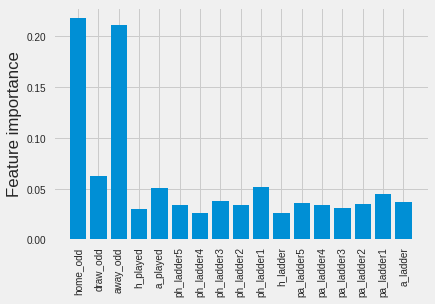

In [43]:
importance = xgb.feature_importances_
plt.bar(range(17), importance, tick_label = ['home_odd','draw_odd', 'away_odd', 'h_played', 
                'a_played', 'ph_ladder5', 'ph_ladder4', 'ph_ladder3', 'ph_ladder2', 'ph_ladder1', 
                'h_ladder', 'pa_ladder5', 'pa_ladder4', 'pa_ladder3', 'pa_ladder2', 'pa_ladder1',
               'a_ladder'])
plt.xticks(rotation=90)
plt.ylabel('Feature importance')

In [44]:
nr.seed(1115)
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
X_test = scale.transform(X_test)
scores = rf.predict(X_test)

In [46]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AWAY         HOME           DRAW')
    print('Actual AWAY     %6d' % conf[0,0] + '     %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual HOME     %6d' % conf[1,0] + '     %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual DRAW     %6d' % conf[2,0] + '     %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('             AWAY    HOME            DRAW')
    print('Num case   %0.2f' % metrics[3][0] + '    %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '   %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '   %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '   %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)    

                 Confusion matrix
                 AWAY         HOME           DRAW
Actual AWAY        214      2071                51
Actual HOME         85      1886                55
Actual DRAW        196      2756               136

Accuracy        0.30
 
             AWAY    HOME            DRAW
Num case   2336.00    2026.00      3088.00
Precision   0.43   0.28       0.56
Recall      0.09   0.93       0.04
F1          0.15   0.43       0.08


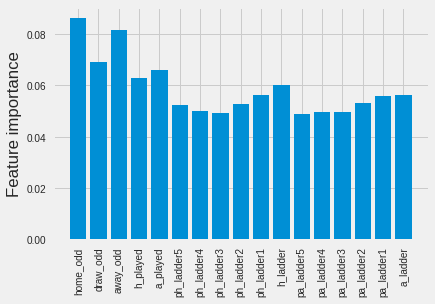

In [47]:
importance = rf.feature_importances_
plt.bar(range(17), importance, tick_label = ['home_odd','draw_odd', 'away_odd', 'h_played', 
                'a_played', 'ph_ladder5', 'ph_ladder4', 'ph_ladder3', 'ph_ladder2', 'ph_ladder1', 
                'h_ladder', 'pa_ladder5', 'pa_ladder4', 'pa_ladder3', 'pa_ladder2', 'pa_ladder1',
               'a_ladder'])
plt.xticks(rotation=90)
plt.ylabel('Feature importance')

In [48]:
mlp=MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [49]:
X_test = scale.transform(X_test)
scores = mlp.predict(X_test)

In [50]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AWAY         HOME           DRAW')
    print('Actual AWAY     %6d' % conf[0,0] + '     %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual HOME     %6d' % conf[1,0] + '     %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual DRAW     %6d' % conf[2,0] + '     %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('             AWAY    HOME            DRAW')
    print('Num case   %0.2f' % metrics[3][0] + '    %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '   %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '   %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '   %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)    

                 Confusion matrix
                 AWAY         HOME           DRAW
Actual AWAY        125      1844               367
Actual HOME         69      1678               279
Actual DRAW        243      2295               550

Accuracy        0.32
 
             AWAY    HOME            DRAW
Num case   2336.00    2026.00      3088.00
Precision   0.29   0.29       0.46
Recall      0.05   0.83       0.18
F1          0.09   0.43       0.26
